In [6]:
include(joinpath(dirname(Base.active_project()), "src", "AutoSpider.jl"))
using .AutoSpider, HDF5

include(joinpath(AutoSpider.FUNCTION_PATH, "VizUtils.jl"))
using .VizUtils

orders::Array{Int} = [2,3,4,5,6]

5-element Vector{Int64}:
 2
 3
 4
 5
 6

[8.036291069681573e-7, 7.78957873764384e-7, 7.553093398715452e-7, 7.326315839024772e-7, 7.108756767392686e-7, 6.899954907295459e-7, 6.699475225452744e-7, 6.506907285667027e-7, 6.321863717659978e-7, 6.143978791643526e-7, 5.972907090245276e-7, 5.808322270192511e-7, 5.649915906855048e-7, 5.497396415376631e-7, 5.35048804267665e-7, 5.208929925104017e-7, 5.072475206975102e-7, 4.940890215628335e-7, 4.813953688990372e-7, 4.6914560519766184e-7, 4.573198738342508e-7, 4.4589935548703164e-7, 4.348662085018266e-7, 4.242035129378747e-7, 4.138952180489182e-7, 4.0392609297435174e-7, 3.942816804265221e-7, 3.8494825318248894e-7, 3.75912773197595e-7, 3.6716285317271874e-7, 3.5868672041871237e-7, 3.504731828723273e-7, 3.4251159712790794e-7, 3.3479183835834914e-7, 3.273042720073012e-7, 3.2003972714248096e-7, 3.1298947136763574e-7, 3.061451871960838e-7, 2.994989497971227e-7, 2.930432060307123e-7, 2.8677075469197123e-7, 2.806747278919288e-7, 2.747485735056658e-7, 2.689860386233407e-7, 2.633811539436689e-7, 2

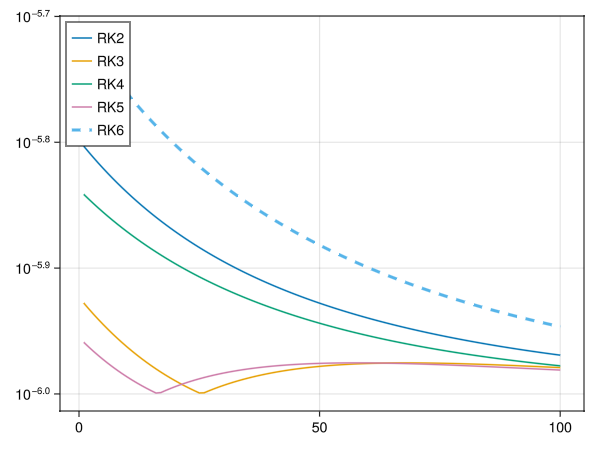

In [11]:
using Statistics, LinearAlgebra, GLMakie

viz_dict::Dict = Dict()

for i in eachindex(orders)
    viz_dict[i] = Dict()
    path::String = joinpath(AutoSpider.HDF5_PATH, "implicit", "data-RK" * repr(orders[i]) * ".hdf5")
    h5open(path, "r") do file
        viz_dict[i]["p"] = read(file, "result/value/p/value")
    end
end

tmax=100
tr = 1:tmax
tsqsum(x) = [mean(x[:,:,t].^2) for t = 1:tmax]

psums::Vector{Vector{Float64}} = []
for i in eachindex(orders)
    push!(psums, tsqsum(viz_dict[i]["p"]))
end

mins::Vector{Float64} = []
for t in 1:tmax
    push!(mins, mean(permutedims(hcat(psums...))[:,t]))
end

println(mins)

f = Figure()
ax = Axis(f[1, 1], yscale=log10)
lines!(ax, tr, abs.(psums[1] - mins) .+ 1e-6, label="RK2")
lines!(ax, tr, abs.(psums[2] - mins) .+ 1e-6, label="RK3")
lines!(ax, tr, abs.(psums[3] - mins) .+ 1e-6, label="RK4")
lines!(ax, tr, abs.(psums[4] - mins) .+ 1e-6, label="RK5")
lines!(ax, tr, abs.(psums[5] - mins) .+ 1e-6, label="RK6", linewidth=3, linestyle = :dash)

axislegend(position = :lt)

f

In [8]:
model_results::Dict = Dict()

for i in eachindex(orders)
    path::String = joinpath(AutoSpider.HDF5_PATH, "implicit", "data-RK" * repr(orders[i]) * ".hdf5")
    model_results[i] = AutoSpider.auto_spider(path, joinpath("compare", "settings_default.json"))
    println()
end

∂u/∂x + ∂v/∂y = 0
∂Bx/∂t - 0.016∂^2Bx/∂x^2 - 0.016∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂By/∂t - 0.016∂^2By/∂x^2 - 0.016∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
0.993∂u/∂t + 0.993∂u^2/∂x + 0.992∂uv/∂y - 0.015∂^2u/∂x^2 - 0.015∂^2u/∂y^2 + 0.993∂P/∂x - 0.994∂Bx^2/∂x - ∂BxBy/∂y = 0
∂v/∂t + 0.991∂uv/∂x + 0.993∂v^2/∂y - 0.016∂^2v/∂x^2 - 0.015∂^2v/∂y^2 + 0.994∂P/∂y - ∂By^2/∂y - 0.994∂BxBy/∂x = 0

∂u/∂x + ∂v/∂y = 0
∂u/∂t + ∂u^2/∂x + ∂uv/∂y - 0.016∂^2u/∂x^2 - 0.016∂^2u/∂y^2 + ∂P/∂x - ∂Bx^2/∂x - ∂BxBy/∂y = 0
∂Bx/∂t - 0.016∂^2Bx/∂x^2 - 0.016∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂By/∂t - 0.016∂^2By/∂x^2 - 0.016∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
∂v/∂t + 0.994∂uv/∂x + 0.993∂v^2/∂y - 0.016∂^2v/∂x^2 - 0.016∂^2v/∂y^2 + ∂P/∂y - 0.994∂By^2/∂y - 0.994∂BxBy/∂x = 0

∂u/∂x + ∂v/∂y = 0
∂Bx/∂t - 0.016∂^2Bx/∂x^2 - 0.016∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂By/∂t - 0.016∂^2By/∂x^2 - 0.016∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
0.992∂v/∂t + ∂uv/∂x + ∂v^2/∂y - 0.015∂^2v/∂x^2 - 0.015∂^2v/∂y^2 + ∂P/∂y - ∂By^2/∂y - ∂BxBy/∂x = 0
∂u/∂t +

In [ ]:
label_weight_dict::Dict = Dict()

for i in eachindex(orders)
    label_weight_dict[i] = Dict()
    for j in 1:5
        for k in eachindex(model_results[i][j]["label"])
            label_index::String = model_results[i][j]["label"][k]
            coeff::Float64 = model_results[i][j]["coeff"][k]
            label_weight_dict[i][label_index] = coeff
        end
    end
end

label_arr::Vector{String} = collect(keys(label_weight_dict[length(orders)]))

28-element Vector{Any}:
 "∂uv/∂y"
 "∂^2By/∂y^2"
 "∂vBx/∂x"
 "∂Bx^2/∂x"
 "∂P/∂x"
 "∂v/∂y"
 "∂^2u/∂y^2"
 "∂^2Bx/∂x^2"
 "∂^2v/∂y^2"
 "∂^2By/∂x^2"
 "∂By^2/∂y"
 "∂uBy/∂x"
 "∂vBx/∂y"
 ⋮
 "∂By/∂t"
 "∂Bx/∂t"
 "∂u/∂t"
 "∂BxBy/∂y"
 "∂^2Bx/∂y^2"
 "∂uBy/∂y"
 "∂u^2/∂x"
 "∂u/∂x"
 "∂^2u/∂x^2"
 "∂v^2/∂y"
 "∂^2v/∂x^2"
 "∂v/∂t"

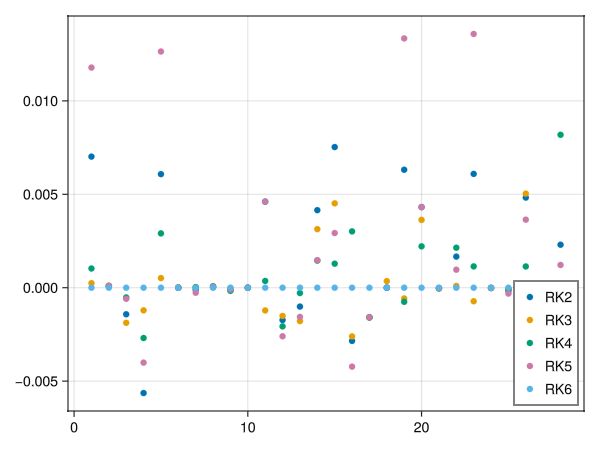

In [10]:
using GLMakie

function get_label_diffs(k)::Vector{Float64}
    return ([label_weight_dict[length(orders)][key] - label_weight_dict[k][key] for key in label_arr if key in keys(label_weight_dict[k])])
end

f = Figure()
ax = Axis(f[1, 1])
for k in eachindex(orders)
    scatter!(ax,
    1:length(keys(label_weight_dict[k])),
    get_label_diffs(k),
label="RK" * repr(orders[k]))
end

axislegend(position = :rb)

f